In [12]:
# related third party imports
import retro
import torch
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
# local application/library specific imports
from agent import DQN, ReplayMemory, train_agent, save_model
from environment import get_screen, show_example_screen
# Auto-reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup Device and Environment - run only once

Device loaded: cuda
Environment loaded: StreetFighterIISpecialChampionEdition-Genesis


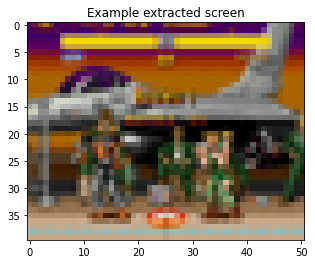

In [2]:
# setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# setup environment
rom_name = 'StreetFighterIISpecialChampionEdition-Genesis'
env = retro.make(game=rom_name).unwrapped
# setup matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()
# setup device (cpu/cuda)
print(f'Device loaded: {device}')
print(f'Environment loaded: {rom_name}')
show_example_screen(device, env)

## Define Training Parameters

In [6]:
# Training parameters
eps_start = 0.9
eps_end = 0.05
eps_decay = 200
n_actions = 11
batch_size = 128
gamma = 0.999
target_update = 10
num_episodes = 1

## Initialize DQN

In [7]:
# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
init_screen = get_screen(device, env)
_, _, screen_height, screen_width = init_screen.shape
policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)

## Train agent

In [8]:
episode_durations, episode_rewards = train_agent(device, env, policy_net, target_net, memory,optimizer, 
                                                 n_actions, num_episodes, eps_start, eps_end,
                                                 eps_decay, batch_size, gamma, target_update, verbose=True)

print('Complete')

Finished 0 frames
Finished 100 frames
Finished 200 frames
Finished 300 frames
Finished 400 frames
Finished 500 frames
Finished 600 frames
Finished 700 frames
Finished 800 frames
Finished 900 frames
Finished 1000 frames
Finished 1100 frames
Finished 1200 frames
Finished 1300 frames
Finished 1400 frames
Finished 1500 frames
Finished 1600 frames
Finished 1700 frames
Finished 1800 frames
Finished 1900 frames
Finished 2000 frames
Finished 2100 frames
Finished 2200 frames
Finished 2300 frames
Finished 2400 frames
Finished 2500 frames
Finished 2600 frames
Finished 2700 frames
Finished 2800 frames
Finished 2900 frames
Finished 3000 frames
Finished 3100 frames
Finished 3200 frames
Finished 3300 frames
Finished 3400 frames
Finished 3500 frames
Finished 3600 frames
Finished 3700 frames
Finished 3800 frames
Finished 3900 frames
Finished 4000 frames
Finished 4100 frames
Finished 4200 frames
Finished 4300 frames
Finished 4400 frames
Finished 4500 frames
Finished 4600 frames
Finished 4700 frames
Fini

## Plot results

Text(0, 0.5, 'Total Reward')

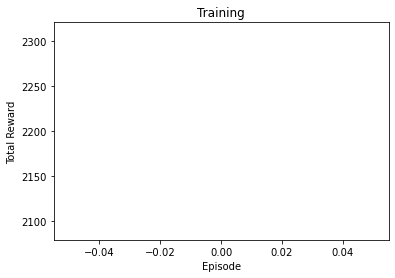

In [10]:
env.render()
env.close()
plt.ioff()
#plt.show()
plt.plot(episode_rewards)
plt.title('Training')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [13]:
save_model(policy_net)

C:\Users\rajkk\PycharmProjects\Ryuenforcement-Learning\ryuenforcement\saved_files\hadouken_2020-07-07.pt
